In [164]:
import pandas as pd
import numpy as np
import helper
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt
import re
import datetime

from scipy import stats
from scipy.stats import pearsonr, spearmanr

from googletrans import Translator

In [37]:
data = pd.read_csv('daily8_4.csv')
#import data with sentiment analysis

In [40]:
data.info()
#snapshot of df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276181 entries, 0 to 276180
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   index           276181 non-null  int64         
 1   id              276181 non-null  object        
 2   url             276181 non-null  object        
 3   headline        276181 non-null  object        
 4   dateline        276181 non-null  datetime64[ns]
 5   text            276181 non-null  object        
 6   tags            276181 non-null  object        
 7   source          276181 non-null  object        
 8   text_label      276181 non-null  object        
 9   text_score      276181 non-null  object        
 10  headline_label  276181 non-null  object        
 11  headline_score  276181 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 25.3+ MB


In [38]:
data['dateline'] = pd.to_datetime(data.dateline)
#convert data type 

In [142]:
df = data.copy()
#make df copy for easy reference

### Explore Question 1: What is the relationship between tag and target?
- Do tag categories have any interesting relationships with the target and/or source?

In [100]:
df.tags.nunique()
#see how many values

911

In [143]:
topics = {'America' : 'أمريكا',
            'American' : 'أمريكيّ',
            'American (f)' : 'أمريكيّة',
            'American (pl)' : 'أمريكيّين',
            'The United States' : 'الولايات المتحدة',
            'The United States' : 'دول موحّدة',
            'Washington' : 'واشنطن',
            'Bush' : 'بوش',
            'Obama' : 'أوباما',
            'Cheney' : 'تشيني',
            'Clinton' : 'كلينتون',
            'Osama Bin Laden' : 'أسامة بن لادن',
            'Al Gore' : 'آل غور',
            'World Trade Center' : 'مركز التجارة العالمي',
            '9/11' : '9/11',
            'September 11' : '11 سبتمبر',
            'Gulf War' : 'حرب الخليج',
            'Google' : 'غوغل',
            'Facebook' : 'فيسبوك',
            'Al Qaida' : 'القاعدة'}

def flip_key_value_pairs(dicts):
    
    res = dict((v,k) for k,v in dicts.items())    
    return res


def make_eng_tags(df_tags):
    eng_tags =[]
    
    rev_topics = flip_key_value_pairs(topics)
    for key, value in rev_topics.items():
        if key in df_tags:
            eng_tags.append(value)
            
    return eng_tags

df['english_tags'] = df.tags.apply(make_eng_tags)
#translates tags to english

In [144]:
tag_count = dict(df['tags'].value_counts())
df['tag_count'] = df['tags']
df['tag_count'] = df['tag_count'].map(tag_count)

next_10= df[df.tag_count > 1550]
next_10= next_10[next_10.tag_count < 3800]
top_10= df[df.tag_count > 3800]

#only the top 20 tags

In [151]:
next_10['en_tags'] = next_10['english_tags'].apply(lambda x: ','.join(map(str, x)))
top_10['en_tags'] = top_10['english_tags'].apply(lambda x: ','.join(map(str, x)))
df['en_tags'] = df['english_tags'].apply(lambda x: ','.join(map(str, x)))
#change format

In [146]:
top_10['en_tags'].unique()
#english tags

array(['Washington,Bush', 'Bush', 'Al Qaida', 'Clinton', 'Washington',
       'America', 'Washington,Al Qaida', 'Washington,Obama', 'Facebook',
       'Obama'], dtype=object)

In [147]:
next_10['en_tags'].unique()
#english tags

array(['Osama Bin Laden,Al Qaida', 'September 11', 'Bush,Al Qaida',
       'Gulf War', 'Washington,Clinton', '9/11', 'America,Bush',
       'America,Al Qaida', 'America,Washington', 'America,Obama'],
      dtype=object)

In [348]:
next_10 = next_10[next_10.text_label != 'False']
next_perc = pd.crosstab(next_10.en_tags, next_10.text_label, margins=True)
next_perc = next_perc.apply(lambda x: x / x['All'] * 100, axis=1)
next_perc = next_perc.drop(columns=['All'])

top_10 = top_10[top_10.text_label != 'False']
top_perc = pd.crosstab(top_10.en_tags, top_10.text_label, margins=True)
top_perc = top_perc.apply(lambda x: x / x['All'] * 100, axis=1)
top_perc = top_perc.drop(columns=['All'])

/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_69268/387808792.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


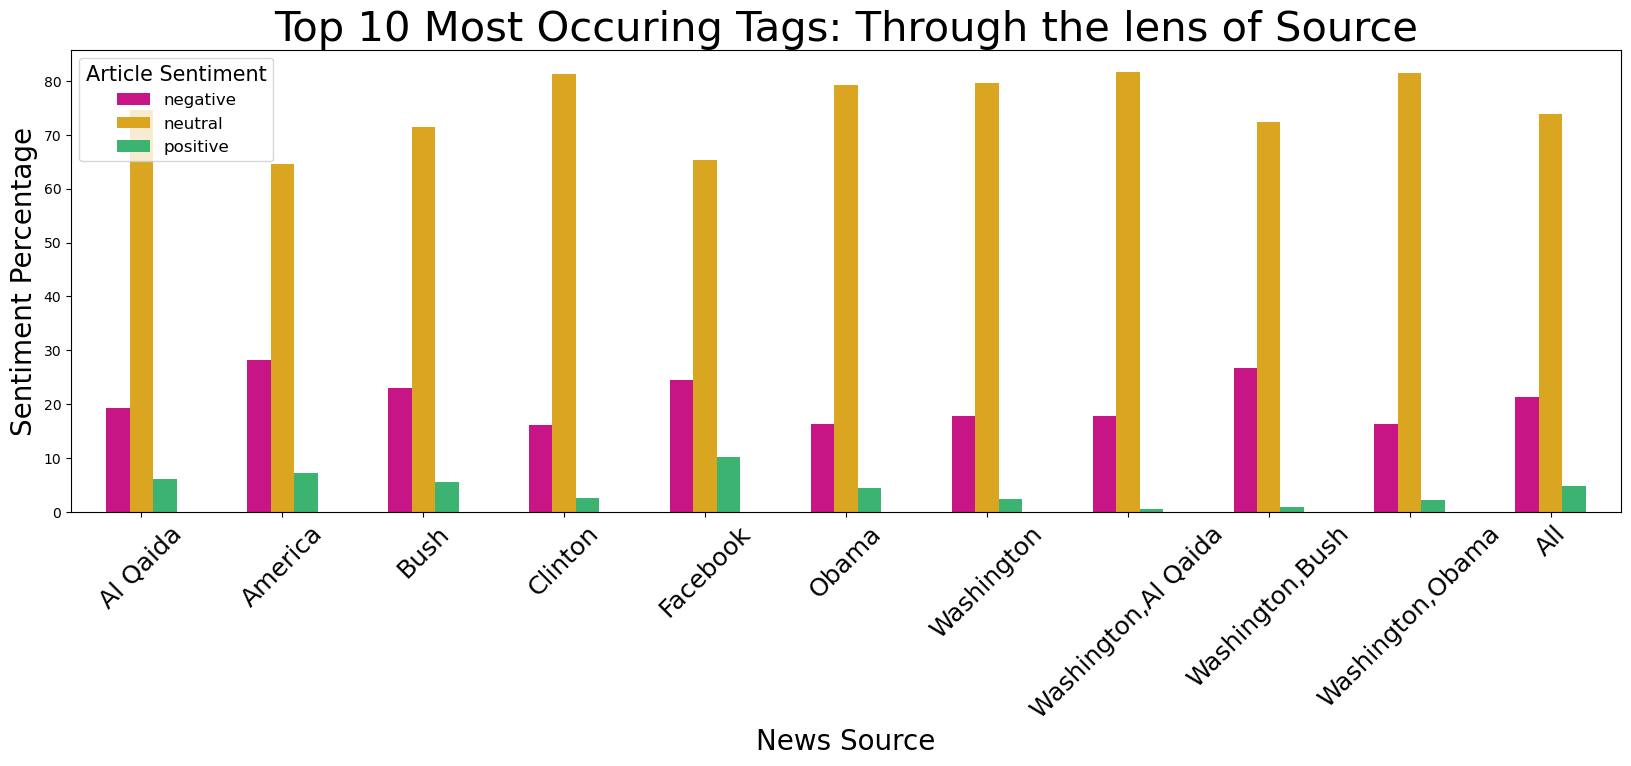

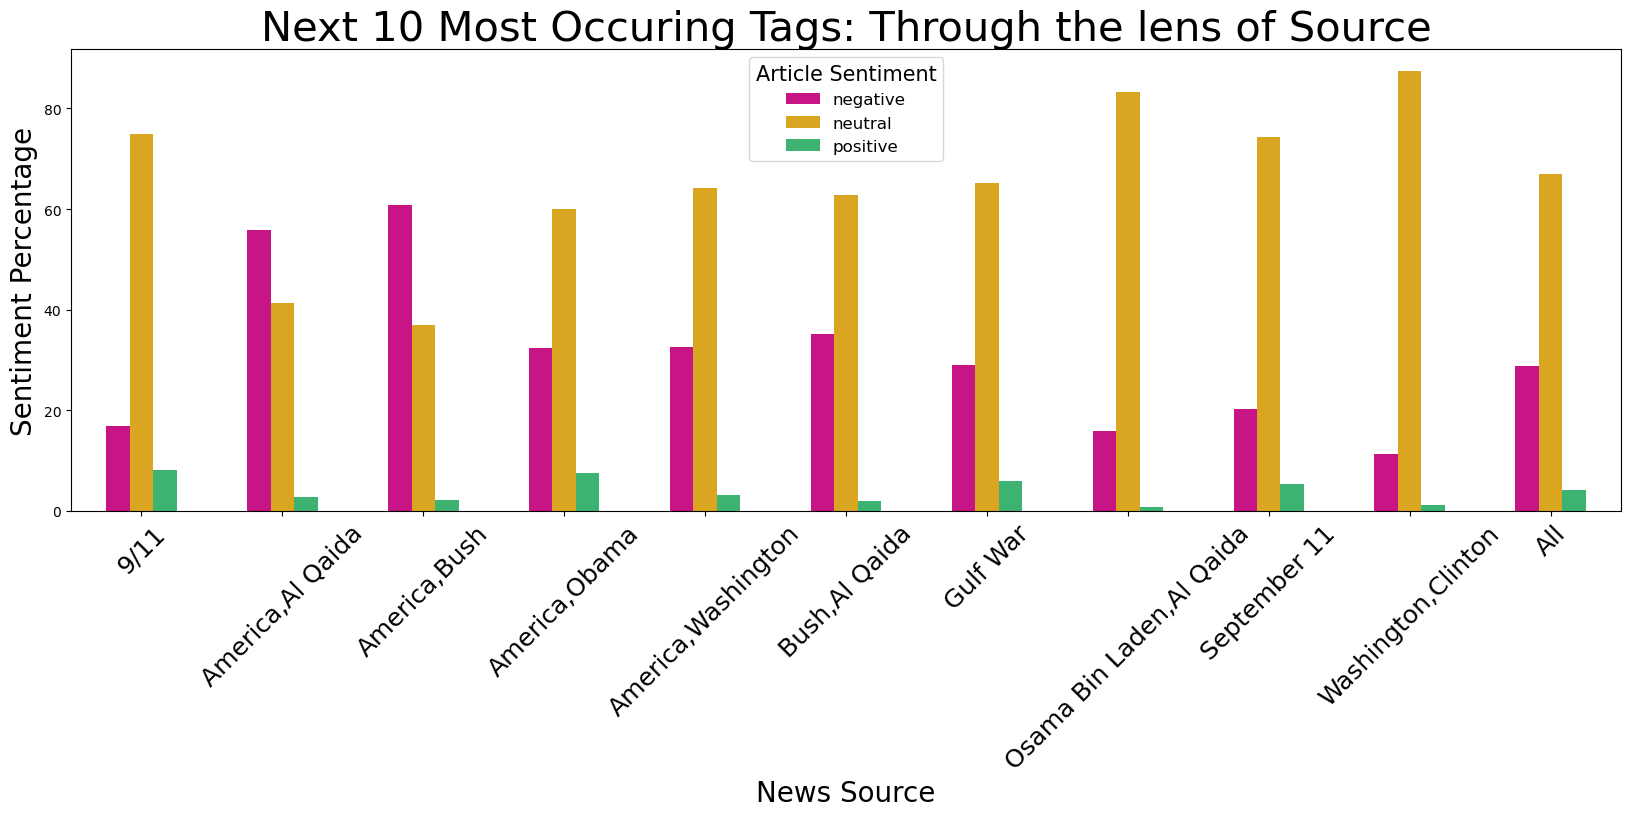

In [349]:
plt.rcParams["figure.figsize"] = (20, 6)

ax1= top_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen', 'purple'])
ax2= next_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen', 'purple'])

ax1.set_xlabel("News Source", fontsize=20)
ax2.set_xlabel("News Source", fontsize=20)

ax1.set_ylabel("Sentiment Percentage", fontsize=20)
ax2.set_ylabel("Sentiment Percentage", fontsize=20)

xlabels = ax1.get_xticklabels() 
ax1.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)
xlabels = ax2.get_xticklabels() 
ax2.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)

ax1.set_title('Top 10 Most Occuring Tags: Through the lens of Source', size=30)
ax1.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

ax2.set_title('Next 10 Most Occuring Tags: Through the lens of Source', size=30)
ax2.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

fig.tight_layout()
fig.show()


Statistical Test

- H0: The top 10 most frequently occuring tags and and text_label (sentiment) are independent of one another
- H1:  The top 10 most frequently occuring tags and and text_label (sentiment) are have a relationship

In [168]:
alpha =.05
#set alpha
observed = pd.crosstab(top_10.en_tags, top_10.text_label)

chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Reject the null hypothesis.


Statistical Test

- H0: The next 10 most frequently occuring tags and and text_label (sentiment) are independent of one another
- H1:  The next 10 most frequently occuring tags and and text_label (sentiment) are have a relationship

In [170]:
alpha =.05

observed = pd.crosstab(next_10.en_tags, next_10.text_label)

chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Reject the null hypothesis.


In [153]:
bush = df[(df['en_tags'] == 'Bush')]
obama = df[(df['en_tags'] == 'Obama')]
clinton = df[(df['en_tags'] == 'Clinton')]

presidents = pd.concat([bush, obama, clinton])
#dfs for presidents

In [154]:
bush.text_label.value_counts(normalize = True)
#percentage of sentiment

neutral     0.714777
negative    0.230012
positive    0.055211
Name: text_label, dtype: float64

In [155]:
obama.text_label.value_counts(normalize = True)
#percentage of sentiment

neutral     0.793490
negative    0.162403
positive    0.044107
Name: text_label, dtype: float64

In [156]:
clinton.text_label.value_counts(normalize = True)
#percentage of sentiment

neutral     0.813228
negative    0.161422
positive    0.025350
Name: text_label, dtype: float64

### Are there any sources that have change in sentiment based on president?

In [305]:
pres_perc = pd.crosstab(presidents.source, presidents.text_label, margins=True)
pres_perc = pres_perc.apply(lambda x: x / x['All'] * 100, axis=1)
pres_perc = pres_perc.drop(columns=['All'])

clinton_perc = pd.crosstab(clinton.source, clinton.text_label, margins=True)
clinton_perc = clinton_perc.apply(lambda x: x / x['All'] * 100, axis=1)
clinton_perc = clinton_perc.drop(columns=['All'])

bush_perc = pd.crosstab(bush.source, bush.text_label, margins=True)
bush_perc = bush_perc.apply(lambda x: x / x['All'] * 100, axis=1)
bush_perc = bush_perc.drop(columns=['All'])

obama_perc = pd.crosstab(obama.source, obama.text_label, margins=True)
obama_perc = obama_perc.apply(lambda x: x / x['All'] * 100, axis=1)
obama_perc = obama_perc.drop(columns=['All'])

/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_69268/3181898798.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


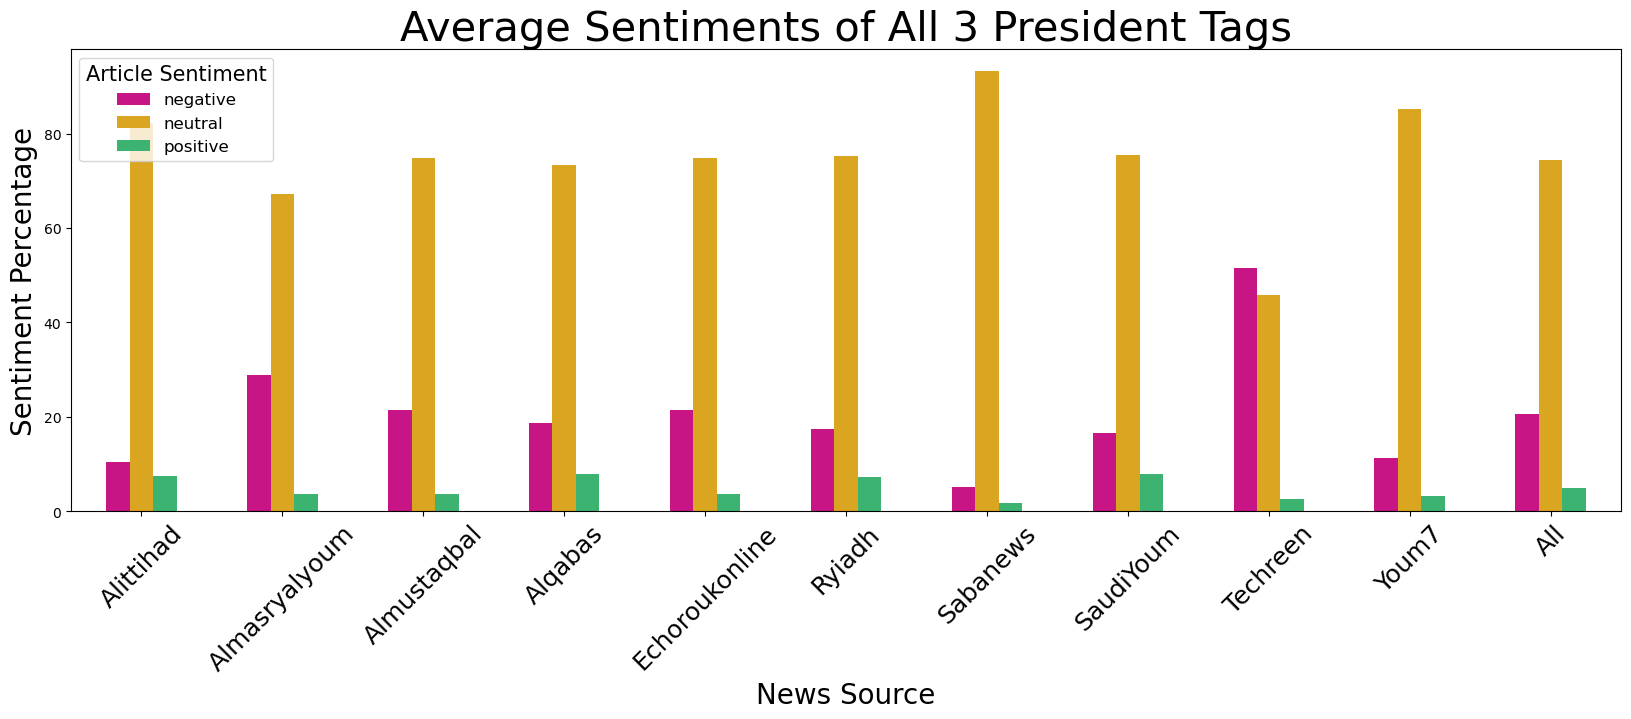

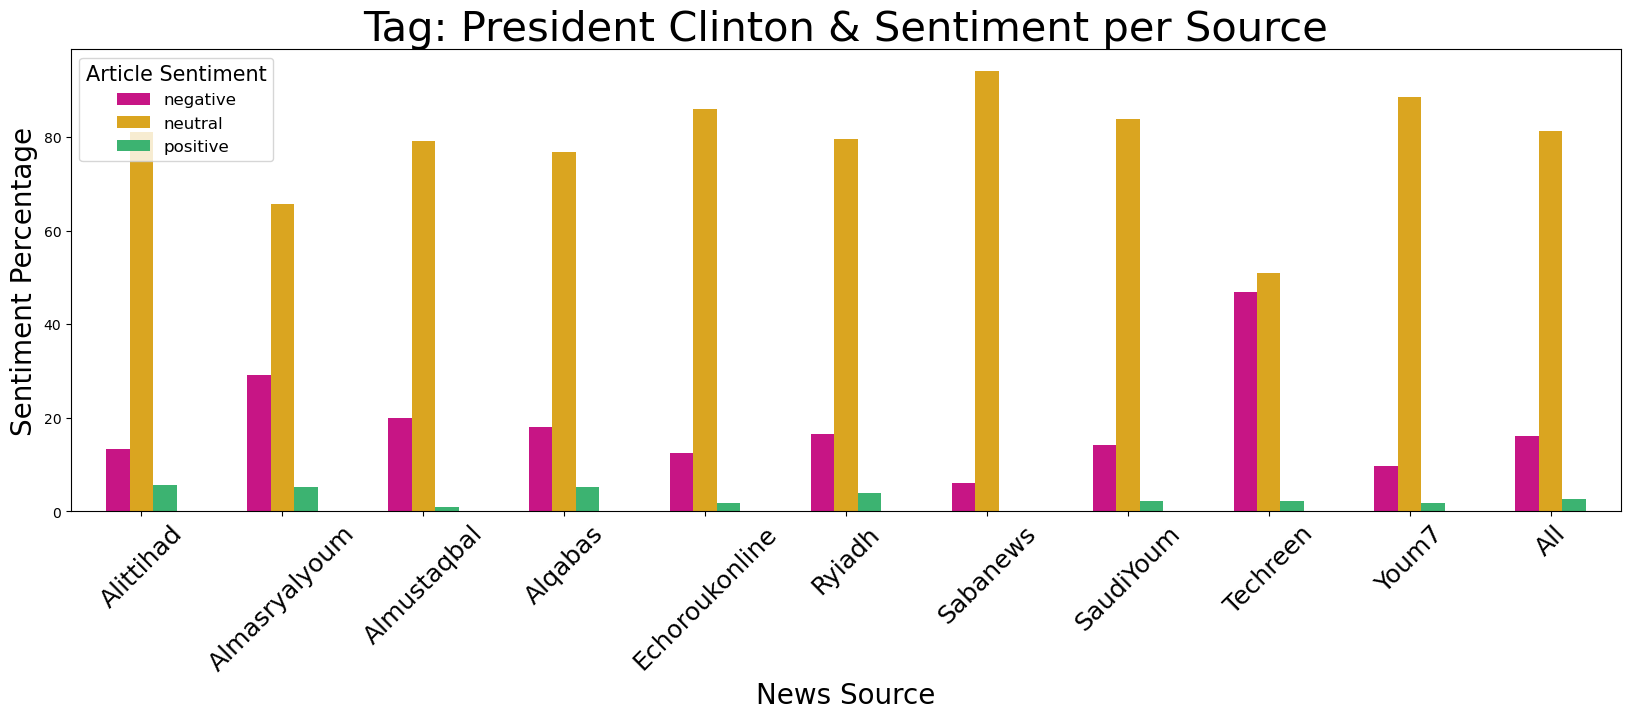

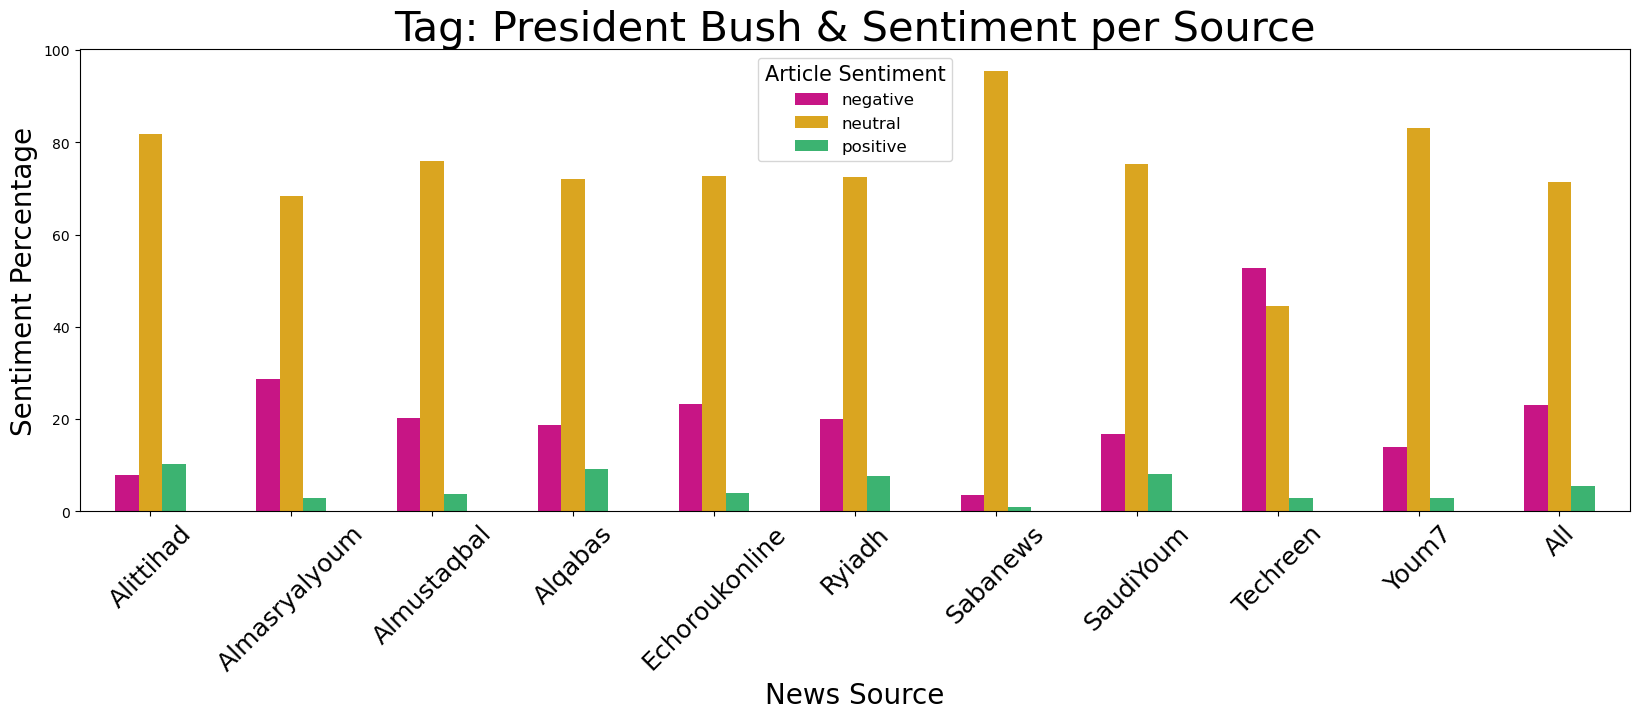

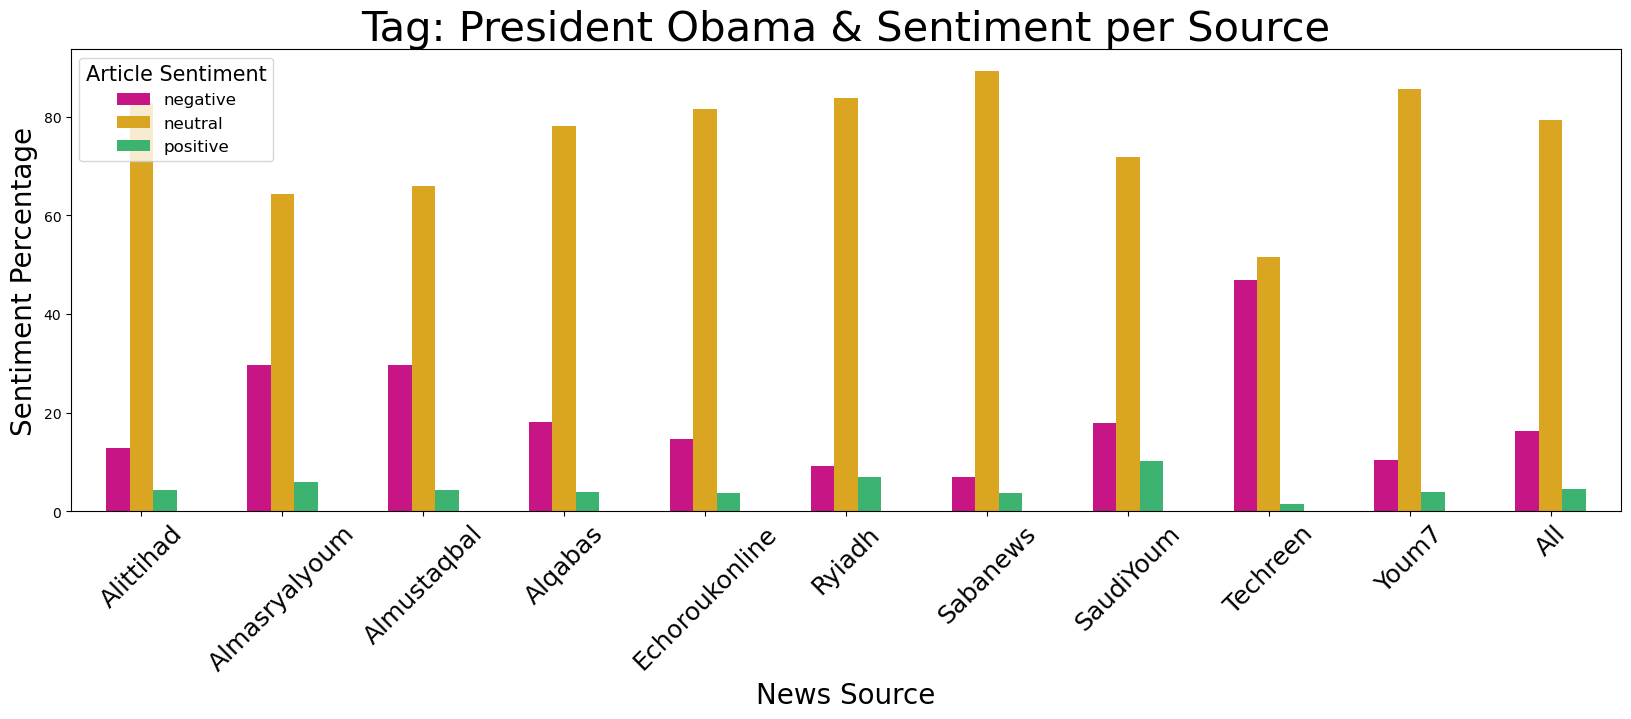

In [329]:
plt.rcParams["figure.figsize"] = (20, 6)

ax1= pres_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen', 'purple'])
ax2= clinton_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen', 'purple'])
ax3= bush_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen', 'purple'])
ax4= obama_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen', 'purple'])

ax1.set_xlabel("News Source", fontsize=20)
ax2.set_xlabel("News Source", fontsize=20)
ax3.set_xlabel("News Source", fontsize=20)
ax4.set_xlabel("News Source", fontsize=20)

ax1.set_ylabel("Sentiment Percentage", fontsize=20)
ax2.set_ylabel("Sentiment Percentage", fontsize=20)
ax3.set_ylabel("Sentiment Percentage", fontsize=20)
ax4.set_ylabel("Sentiment Percentage", fontsize=20)


xlabels = ax1.get_xticklabels() 
ax1.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)
xlabels = ax2.get_xticklabels() 
ax2.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)
xlabels = ax3.get_xticklabels() 
ax3.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)
xlabels = ax4.get_xticklabels() 
ax4.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)


ax1.set_title('Average Sentiments of All 3 President Tags', size=30)
ax1.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

ax2.set_title('Tag: President Clinton & Sentiment per Source', size=30)
ax2.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

ax3.set_title('Tag: President Bush & Sentiment per Source', size=30)
ax3.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

ax4.set_title('Tag: President Obama & Sentiment per Source', size=30)
ax4.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)


fig.tight_layout()
fig.show()


Statistical Test

- H0: The US president tags and and text_label (sentiment) are independent of one another
- H1:  The US president tags and text_label (sentiment) are have a relationship

In [165]:
alpha =.05

observed = pd.crosstab(presidents.en_tags, presidents.text_label)

chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Reject the null hypothesis.


### Takeaways-
- Teshreen is more negative towards Bush than the other 2 presidents
- All sources averages are slightly more negative towards Buth
- Almustuqbal is noteably more negative towards Obama
- Most sources seem pretty consistent in sentiment towards presidents

### Explore relationships of the top 3 tags excluding presidents

In [308]:
washington = df[(df['en_tags'] == 'Washington')]
al_q = df[(df['en_tags'] == 'Al Qaida')]
america = df[(df['en_tags'] == 'America')]

In [309]:
al_q.text_label.value_counts(normalize = True)

neutral     0.746667
negative    0.192431
positive    0.060902
Name: text_label, dtype: float64

In [310]:
washington.text_label.value_counts(normalize = True)

neutral     0.797168
negative    0.178638
positive    0.024194
Name: text_label, dtype: float64

In [311]:
america.text_label.value_counts(normalize = True)

neutral     0.645882
negative    0.281843
positive    0.072275
Name: text_label, dtype: float64

#### Interestingly, America has 9% more negative labels than Al Queda

In [313]:
al_q.source.groupby(al_q.text_label).value_counts() 

text_label  source        
negative    SaudiYoum         1018
            Techreen           930
            Youm7              830
            Almustaqbal        808
            Alqabas            767
            Almasryalyoum      646
            Ryiadh             467
            Echoroukonline     395
            Alittihad          290
            Sabanews            42
neutral     Youm7             4682
            SaudiYoum         3574
            Almustaqbal       3378
            Alqabas           2756
            Echoroukonline    2129
            Ryiadh            2064
            Alittihad         2054
            Techreen          1431
            Sabanews          1045
            Almasryalyoum      917
positive    SaudiYoum          682
            Alittihad          259
            Ryiadh             258
            Techreen           202
            Alqabas            176
            Almustaqbal        114
            Youm7              114
            Sabanews        

In [326]:
america_perc = pd.crosstab(america.source, america.text_label, margins=True)
america_perc = america_perc.apply(lambda x: x / x['All'] * 100, axis=1)
america_perc = america_perc .drop(columns=['All'])
america_perc
#look at this in percentages

text_label,negative,neutral,positive
source,,,
Alittihad,9.797297,75.000000,15.202703
Almasryalyoum,43.664278,52.159672,4.176049
Almustaqbal,26.966292,61.797753,11.235955
Alqabas,5.357143,81.785714,12.857143
Echoroukonline,29.398324,65.270373,5.331302
Ryiadh,43.956640,45.311653,10.731707
Sabanews,2.813299,95.907928,1.278772
SaudiYoum,22.737557,63.574661,13.687783
Techreen,44.436256,45.983788,9.579956


In [327]:
alq_perc = pd.crosstab(al_q.source, al_q.text_label, margins=True)
alq_perc = alq_perc.apply(lambda x: x / x['All'] * 100, axis=1)
alq_perc = alq_perc .drop(columns=['All'])
alq_perc

#look at this in percentages

text_label,negative,neutral,positive
source,,,
Alittihad,11.140991,78.908951,9.950058
Almasryalyoum,40.577889,57.600503,1.821608
Almustaqbal,18.790698,78.558140,2.651163
Alqabas,20.735334,74.506623,4.758043
Echoroukonline,15.484124,83.457468,1.058408
Ryiadh,16.744353,74.005020,9.250627
Sabanews,3.541315,88.111298,8.347386
SaudiYoum,19.302237,67.766401,12.931361
Techreen,36.285603,55.833008,7.881389


In [328]:
wash_perc = pd.crosstab(washington.source, washington.text_label, margins=True)
wash_perc = wash_perc.apply(lambda x: x / x['All'] * 100, axis=1)
wash_perc = wash_perc.drop(columns=['All'])
wash_perc

#look at this in percentages

text_label,negative,neutral,positive
source,,,
Alittihad,12.145479,83.316650,4.537871
Almasryalyoum,27.993528,70.604099,1.402373
Almustaqbal,15.198361,83.274353,1.527286
Alqabas,17.654702,79.486763,2.858535
Echoroukonline,16.086435,82.593037,1.320528
Ryiadh,7.687894,88.984509,3.327596
Sabanews,7.209175,92.190060,0.600765
SaudiYoum,17.186492,79.565498,3.248010
Techreen,46.640863,52.004424,1.354714


/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_69268/1834467946.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


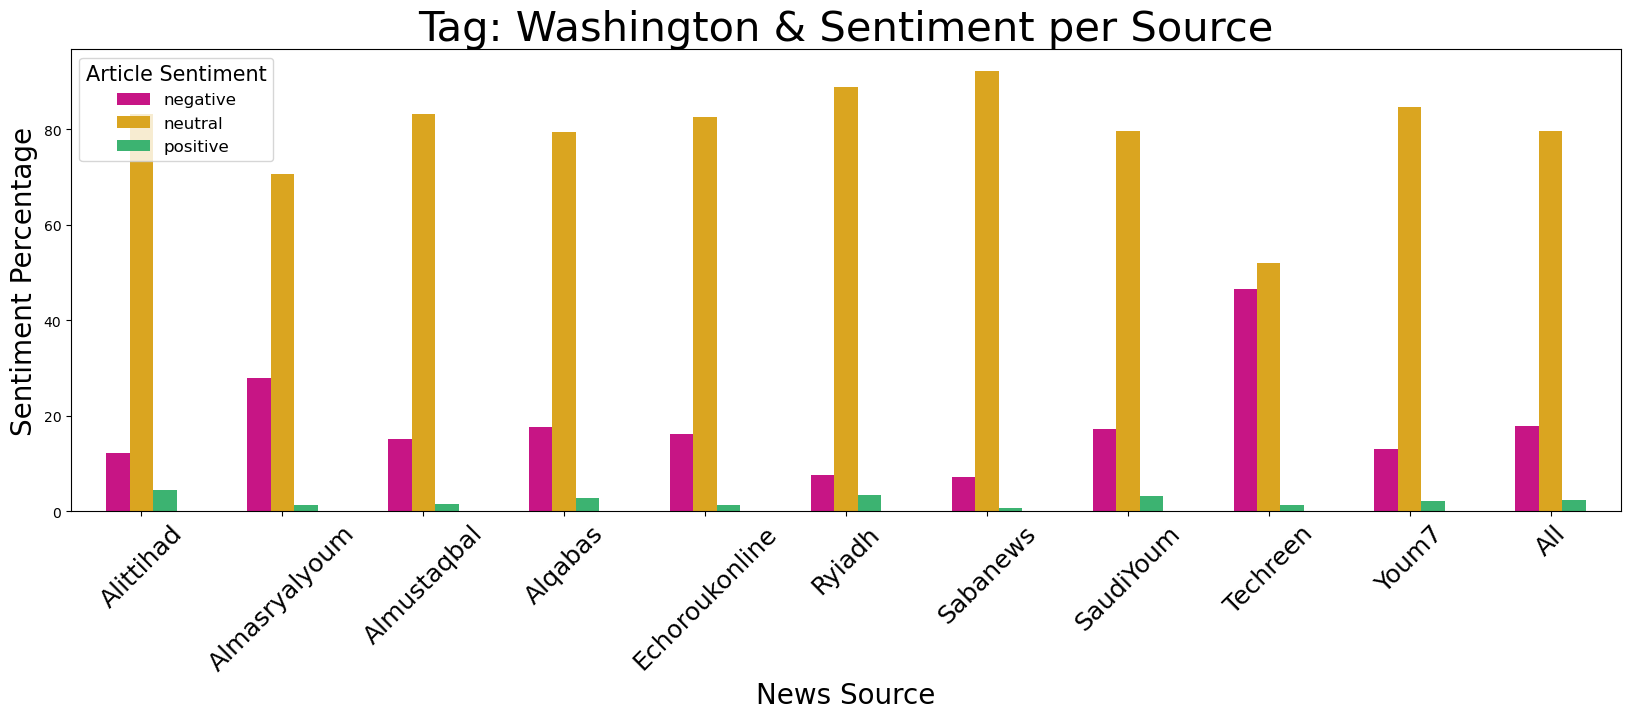

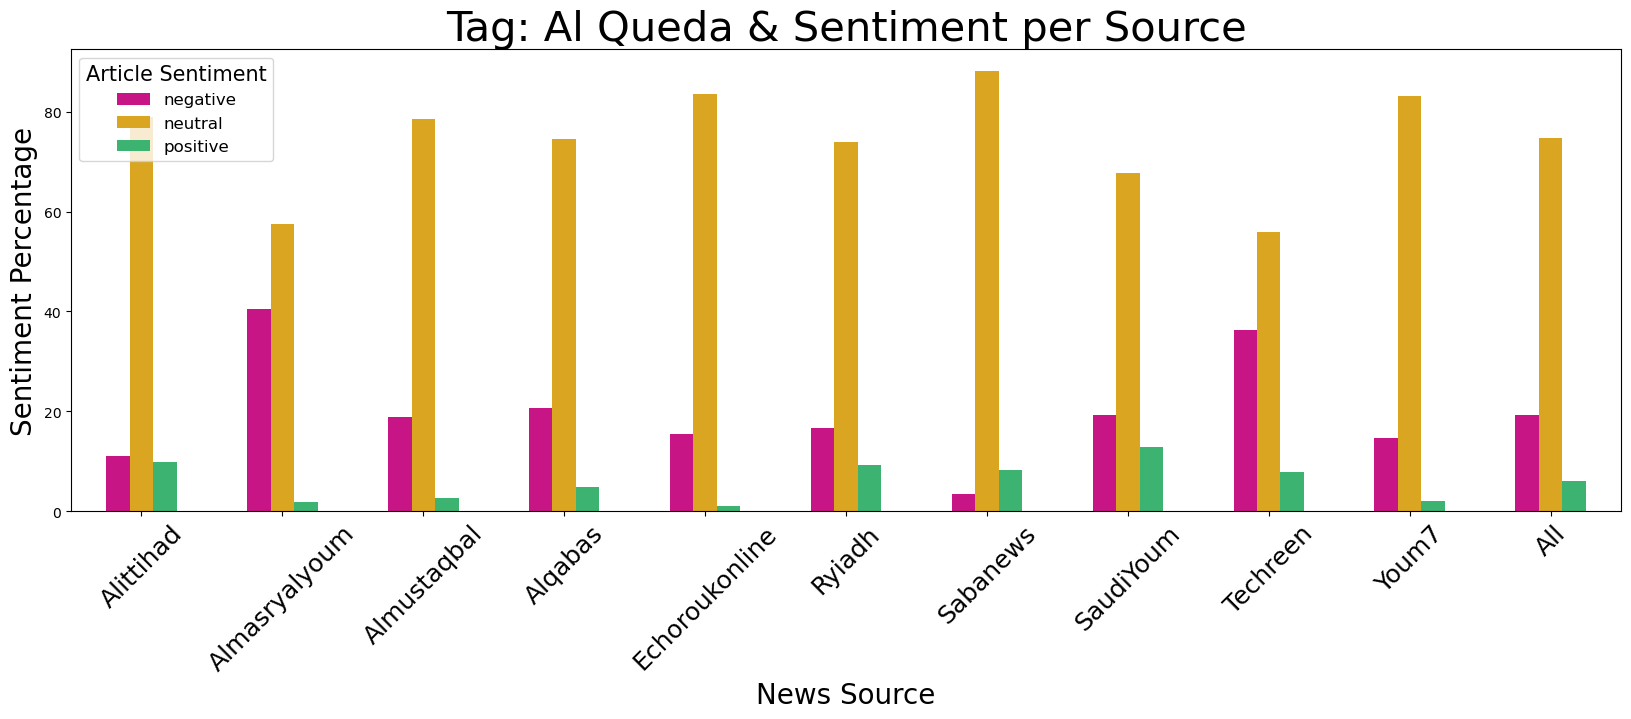

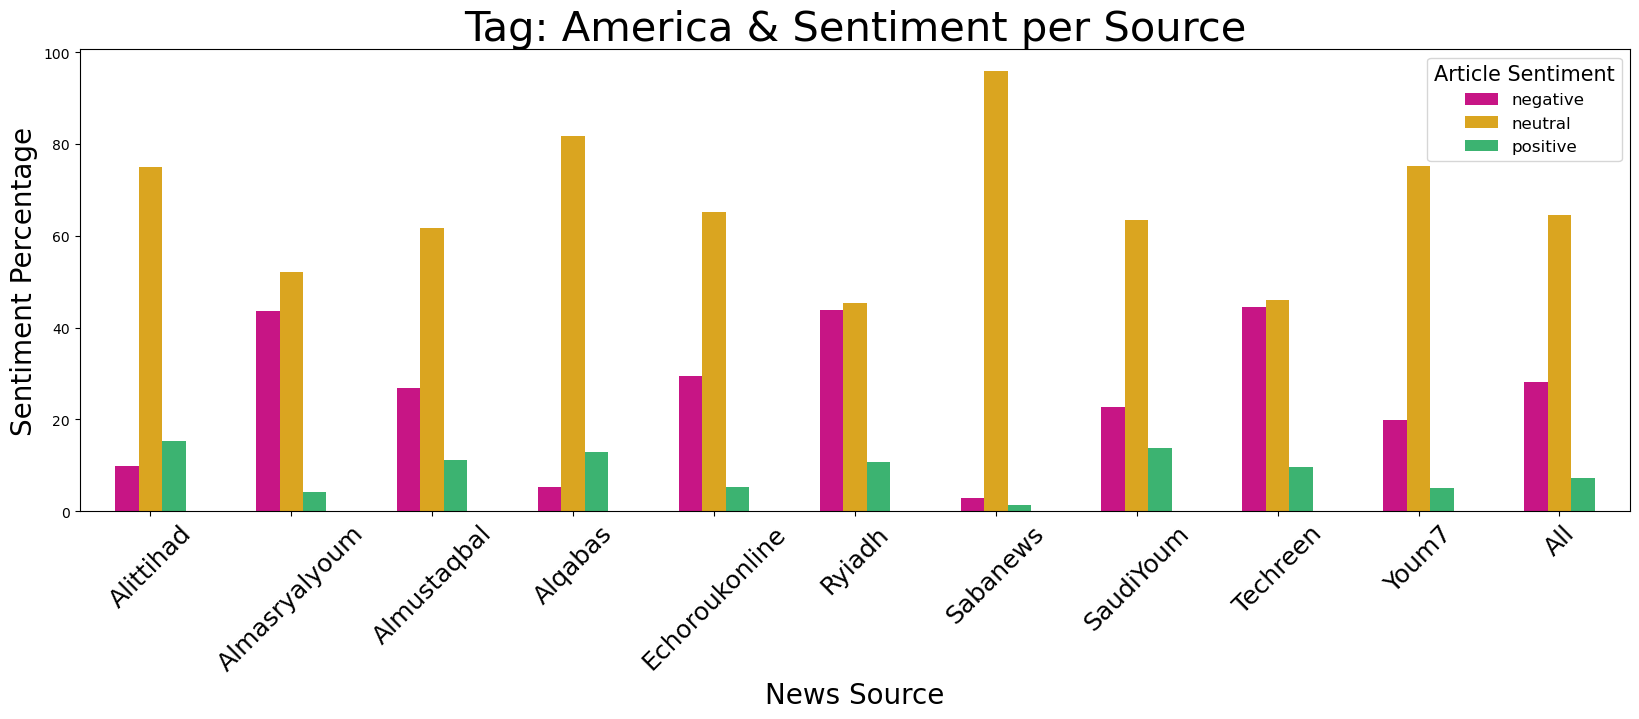

In [325]:
plt.rcParams["figure.figsize"] = (20, 6)

ax1 = wash_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen'])
ax2 = alq_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen'])
ax3 = america_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen'])

ax1.set_xlabel("News Source", fontsize=20)
ax2.set_xlabel("News Source", fontsize=20)
ax3.set_xlabel("News Source", fontsize=20)

ax1.set_ylabel("Sentiment Percentage", fontsize=20)
ax2.set_ylabel("Sentiment Percentage", fontsize=20)
ax3.set_ylabel("Sentiment Percentage", fontsize=20)

xlabels = ax1.get_xticklabels() 
ax1.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)
xlabels = ax2.get_xticklabels() 
ax2.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)
xlabels = ax3.get_xticklabels() 
ax3.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)

ax1.set_title('Tag: Washington & Sentiment per Source', size=30)
ax1.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

ax2.set_title('Tag: Al Queda & Sentiment per Source', size=30)
ax2.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

ax3.set_title('Tag: America & Sentiment per Source', size=30)
ax3.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

fig.tight_layout()
fig.show()

- Interestingly, most sources have slightly more negative America articles than Al Queda (over all 10% more negative for America)
- A large margin favoring Al Queda is seen with Ryiadh and Techreen
- Techreen also has a standout high negative rate for washington
- washington compared with al queda total sentiment is very close. Other than Techreen, there isn't another source that has noteable increased negativity compared to Al Queda here. Ryiadh actually has a noteable increase in neutrals in this subset